# Instructions

Travail individuel à réaliser par chaque étudiant. Chaque fichier devra ensuite être rassemblé par groupe dans le premier dépôt Git de l'année universitaire, dans un nouveau dossier nommé <code>Computer Vision</code>.

Le nom du fichier doit être le prénom de l'étudiant écrit en minuscules. Par exemple, si l'étudiant s'appelle BOB Toto, le fichier doit être nommé toto.ipynb.

# Vision par Ordinateur avec Keras/TensorFlow : Un Notebook Pratique et Conceptuel

Ce notebook a pour objectif de vous guider pas à pas dans la création et l'analyse d'un modèle de réseau de neurones convolutif (CNN) appliqué au jeu de données CIFAR-10. Chaque étape est accompagnée d'explications pratiques ainsi que de questions conceptuelles pour renforcer votre compréhension des enjeux théoriques et pratiques de la vision par ordinateur.

# Détails de l'étudiant
### Nom(s)  : BEZARA
### Prénom(s) :Donatien Jamie
### Classe :IGGLIA 4

## Étape 1 : Introduction et Configuration de l'Environnement

Dans cette étape, nous allons configurer notre environnement de travail et importer les bibliothèques indispensables pour le deep learning et la manipulation de données. Nous vérifions également la version de TensorFlow pour nous assurer que tout fonctionne correctement.

### Explication Pratique
La bonne configuration de l'environnement est cruciale pour garantir la reproductibilité et la stabilité de vos expériences. En particulier, les versions des bibliothèques peuvent influencer le comportement du modèle et sa performance, d'où l'importance de vérifier et documenter ces versions dès le début.

In [ ]:
# Importer les bibliothèques nécessaires
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

print('Version de TensorFlow :', tf.__version__)

### Question  1

**Q1 :** Pourquoi est-il essentiel de vérifier la configuration de l'environnement (versions des bibliothèques, dépendances, etc.) avant de développer un modèle de deep learning ?

_Répondez dans une nouvelle cellule Markdown._

Il est essentiel de vérifier la configuration de l'environnement par ce que cela nous evite L'incomptabiliter de la version. Sur tous que les versions des bibliothèques peuvent influencer le comportement du modèle et sa performance, d'où l'importance de vérifier et documenter ces versions dès le début.Pour eviter tous conflits en les bibliothèques.

## Étape 2 : Chargement et Prétraitement des Données

Nous allons charger le jeu de données CIFAR-10, composé de 60 000 images couleur réparties en 10 classes. Dans cette étape, nous normalisons les valeurs des pixels afin qu'elles soient comprises entre 0 et 1, et nous transformons les étiquettes en format one-hot pour faciliter le processus de classification.

### Explication Pratique
La normalisation aide à stabiliser et accélérer l'entraînement du modèle en assurant que les valeurs d'entrée ont une échelle comparable. Le one-hot encoding évite que le modèle interprète les étiquettes comme des valeurs numériques ordonnées, ce qui est essentiel pour les problèmes de classification multi-classes.

In [ ]:
# Charger le jeu de données CIFAR-10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normaliser les valeurs des pixels (entre 0 et 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertir les vecteurs de classes en matrices binaires (one-hot encoding)
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("Forme des données d'entrainement :", x_train.shape)
print("Forme des étiquettes d'entraînement :", y_train.shape)

Forme des données d'entrainement : (50000, 32, 32, 3)
Forme des étiquettes d'entraînement : (50000, 10)


### Question 2

**Q2 :** Expliquez comment la normalisation des pixels et le one-hot encoding des étiquettes contribuent chacun à la stabilité et à l'efficacité de l'entraînement d'un modèle de deep learning.

_Répondez dans une nouvelle cellule Markdown._

La normalisation des pixels et le one-hot encoding des étiquettes contribuent chacun à la stabilité et à l'efficacité de l'entrainement d'un modèle de deep learning:
Dans le cas de CIFAR-10,  chaque pixel a une valeur entre 0 et 255, la normalisation est effectuée en divisant par 255 pour assurer une échelle cohérente des entrées:
- Accélération de l'entraitement: Réduit les écarts de valeurs entre les pixels, ce qui facilite la mise à jour des poids du modèle.
- Réduction du risque  de saturation des neurones: Certaines fonctions d’activation comme la sigmoïde ou la tangente hyperbolique peuvent saturer si les entrées ont de trop grandes valeurs. La normalisation permet de garder les valeurs dans une plage qui évite ces problèmes.
- Amélioration des généralisations:Un modèle entraîné sur des entrées bien normalisées est souvent plus performant sur des données inconnues.



## Étape 3 : Exploration et Visualisation des Données

Avant de construire le modèle, il est important d'explorer et de visualiser les données. Nous affichons ainsi un échantillon d'images du jeu de données pour mieux comprendre leur contenu et la distribution des classes.

### Explication Pratique
La visualisation des données permet d'identifier d'éventuelles anomalies, comme des classes sous-représentées ou des images bruitées, et de décider si des techniques d'augmentation de données ou de prétraitement supplémentaires sont nécessaires.

In [ ]:
# Afficher quelques images du jeu de données d'entraînement
noms_classes = ['avion', 'automobile', 'oiseau', 'chat', 'cerf',
               'chien', 'grenouille', 'cheval', 'navire', 'camion']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(noms_classes[y_train[i].argmax()])
plt.show()

### Question 3

**Q3 :** D'après la visualisation, discutez de l'impact potentiel d'une distribution inégale des classes ou de la présence d'images de mauvaise qualité sur la performance d'un modèle de classification. Quelles stratégies pourraient être mises en place pour pallier ces problèmes ?

_Répondez dans une nouvelle cellule Markdown._

D' après les images la distribution inégale des classes pourrait nuire à sa performance au classification car plus une image d'une entité X prend place lors de l'entrainnement plus que d'autres, moins les autres seraient identifiable. (i.e: 300-vues de tout perscpective en vue d'angle du cheval  mais peux d'image d'un chaton).
Pour les images de mauvaise qualité, il est nécessaire de les remplacer ou bien simplement de les enlever du datasets.

Pour régler ces problèmes,il nous faudra scrapper divers images en compensation des manques, et de préférence des images claires!

## Étape 4 : Construction du Modèle CNN

Nous allons construire un réseau de neurones convolutif (CNN) pour extraire des caractéristiques hiérarchiques des images. Ce modèle se compose de plusieurs blocs de convolution suivis de couches de pooling et se termine par des couches entièrement connectées pour la classification.

### Explication Pratique
Les couches de convolution permettent au modèle de détecter des motifs locaux (comme les contours ou les textures), tandis que les couches de pooling réduisent la dimensionnalité, ce qui diminue la charge computationnelle et aide à rendre le modèle plus robuste aux translations. Le dropout, quant à lui, est une technique de régularisation qui aide à prévenir le surapprentissage en désactivant aléatoirement certains neurones pendant l'entraînement.

In [ ]:
# Construire le modèle CNN
model = models.Sequential()

# Bloc de convolution 1 : 32 filtres, taille 3x3, activation ReLU
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))

# Bloc de convolution 2 : 64 filtres
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Bloc de convolution 3 : 64 filtres
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Aplatir les sorties et ajouter des couches entièrement connectées
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

In [ ]:
#Construction du model2 du CNN
model_2 = models.Sequential()
# Bloc de convolution 1 : 64 filtres, taille 4x4, activation ReLU
model_2.add(layers.Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu'))
model_2.add(layers.Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu'))
model_2.add(layers.MaxPooling2D(pool_size=(2,2)))
model_2.add(layers.Dropout(0.4))
# Bloc de convolution 2 : 128 filtres, taille 4x4, activation ReLU
model_2.add(layers.Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu'))
model_2.add(layers.Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu'))
model_2.add(layers.MaxPooling2D(pool_size=(2,2)))
model_2.add(layers.Dropout(0.4))
# Aplatir les sorties et ajouter des couches entièrement connectées
model_2.add(layers.Flatten())
model_2.add(layers.Dense(1024,activation='relu'))
model_2.add(layers.Dense(1024,activation='relu'))
model_2.add(layers.Dense(units =10  , activation = 'softmax'))
model_2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
evaluation = model_2.evaluate(x_test, y_test)
print('Test Accuracy of Model_3 (with Batch Normalization): {}'.format(evaluation[1]))

### Question 4

**Q4 :** Décrivez le rôle de chaque composant du CNN (couches de convolution, pooling et dropout) et expliquez comment ils interagissent pour permettre au modèle d'extraire des caractéristiques pertinentes des images.

_Répondez dans une nouvelle cellule Markdown._

Role de chaque composant du CNN :
role: la couche convolutive applique des filtres à l'image d'entrée pour extraire les entités.
interaction:
- chaque filtre détecte un motif spécifique(textures, bords)
- En empilant plusieurs couches convolutives, le modèle apprend des motifs de plus en plus complexes.
Pooling
role: la couche de pooling permet de réduire la dimensionnalité tout en conservant les informations essentielles.
interaction: Les couches de pooling réduisent la taille des données et rendent le modèle plus robuste.
Dropout
role: la couche droupout réduit l'overfitting(surapprentissage) et améliore la généralisation
interaction: Le dropout empêche l’overfitting en forçant le modèle à ne pas trop dépendre de certains neurones.


## Étape 5 : Compilation et Entraînement du Modèle

Nous allons maintenant compiler le modèle en choisissant un optimiseur, une fonction de perte ainsi que des métriques d'évaluation. Ensuite, nous entraînons le modèle sur les données d'entraînement en réservant une partie des données pour la validation.

### Explication Pratique
La compilation configure le processus d'apprentissage, notamment la manière dont les poids seront ajustés via la rétropropagation. Le choix de l'optimiseur (ici, Adam) et la définition des hyperparamètres (comme le taux d'apprentissage et la taille du batch) influencent grandement la vitesse de convergence et la qualité finale du modèle.

In [ ]:
# Compiler le modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(x_train, y_train, epochs=10, batch_size=64,
                    validation_split=0.2)

In [ ]:
# Compiler le modèle
model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Entraîner le modèle
history_2 = model_2.fit(x_train, y_train, epochs=10, batch_size=64,
                    validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.2271 - loss: 2.0118 - val_accuracy: 0.4362 - val_loss: 1.5128
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.4417 - loss: 1.5140 - val_accuracy: 0.5167 - val_loss: 1.3492
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5164 - loss: 1.3366 - val_accuracy: 0.5673 - val_loss: 1.1993
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5578 - loss: 1.2352 - val_accuracy: 0.6125 - val_loss: 1.0957
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5854 - loss: 1.1598 - val_accuracy: 0.6194 - val_loss: 1.0731
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6146 - loss: 1.0839 - val_accuracy: 0.6404 - val_loss: 1.0137
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.6306 - loss: 1.0450 - val_accuracy: 0.6604 - val_loss: 0.9541
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.6487 - loss: 0.9928 - va

### Question 5

**Q5 :** Quels sont les effets d'un choix inadapté d'hyperparamètres (comme le taux d'apprentissage ou la taille du batch) sur l'entraînement d'un réseau de neurones ? Expliquez en quoi un optimiseur bien configuré est crucial pour la convergence du modèle.

_Répondez dans une nouvelle cellule Markdown._

Les effets d'un choix inadapté d'hyperparamètres sont :

  - Sur-apprentissage (overfitting) : Un modèle trop complexe peut mémoriser les données d'entraînement au lieu d'apprendre des tendances généralisables.

   - Sous-apprentissage (underfitting) : Un modèle trop simple ou mal paramétré peut ne pas capturer la complexité des données et donner des performances médiocres.

  - Problèmes de convergence : Un mauvais choix du taux d’apprentissage ou d’autres hyperparamètres peut empêcher le modèle d’atteindre une solution optimale ou provoquer une divergence.

Il est crucial pour la convergence du modèle d'être bien configuré car des hyperparamètres mal ajustés peuvent ralentir l'entraînement, empêcher l'optimisation d'atteindre un minimum optimal ou conduire à un modèle inefficace en production.

## Étape 6 : Évaluation du Modèle

Après l'entraînement, nous évaluons notre modèle sur le jeu de test afin de mesurer sa capacité de généralisation sur des données inédites. Les métriques telles que la perte et la précision nous aident à quantifier la performance globale du modèle.

### Explication Pratique
L'évaluation sur un jeu de test indépendant permet de détecter un éventuel surapprentissage (overfitting). Si le modèle présente une bonne performance sur l'entraînement mais une performance médiocre sur le test, cela indique qu'il n'a pas suffisamment généralisé, ce qui peut nécessiter des ajustements comme plus de régularisation ou des techniques d'augmentation de données.

In [ ]:
# Évaluer le modèle sur le jeu de test
test_loss, test_acc = model_2.evaluate(x_test, y_test, verbose=2)
print('Précision sur le jeu de test :', test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.6837 - loss: 0.9155
Précision sur le jeu de test : 0.6837000250816345


### Question  6

**Q6 :** Que nous indiquent la perte et la précision obtenues lors de l'évaluation sur le jeu de test ? Quels ajustements pourriez-vous envisager si vous observez un écart significatif entre les performances sur l'entraînement et le test ?

_Répondez dans une nouvelle cellule Markdown._

Voyez la figure ci-après:

In [ ]:
def plotloss(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.plot(hist.history['accuracy'])
    plt.xlabel('Epoque')
    plt.ylabel('Perte')
    plt.legend(['Train', 'validation', 'Accuracy'])
    plt.show()

plotloss(history)
plotloss(history_2)


NameError: name 'history_2' is not defined

Les ajustements seront à revoir sur les codes modifiés.  Hyperparameterization, Image Preprocessing,

## Étape 7 : Prédictions et Visualisation des Résultats

Nous allons utiliser le modèle entraîné pour prédire les classes des images du jeu de test. La visualisation des résultats nous permet de comparer les étiquettes prédites aux étiquettes réelles et d'identifier les erreurs potentielles.

### Explication Pratique
La visualisation aide à comprendre qualitativement comment le modèle se comporte face à différentes images. Cela permet d'identifier si certaines classes sont systématiquement mal prédites ou si le modèle confond certaines catégories, ouvrant ainsi la voie à des améliorations ultérieures (par exemple, via l'augmentation de données ou des ajustements de l'architecture).

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


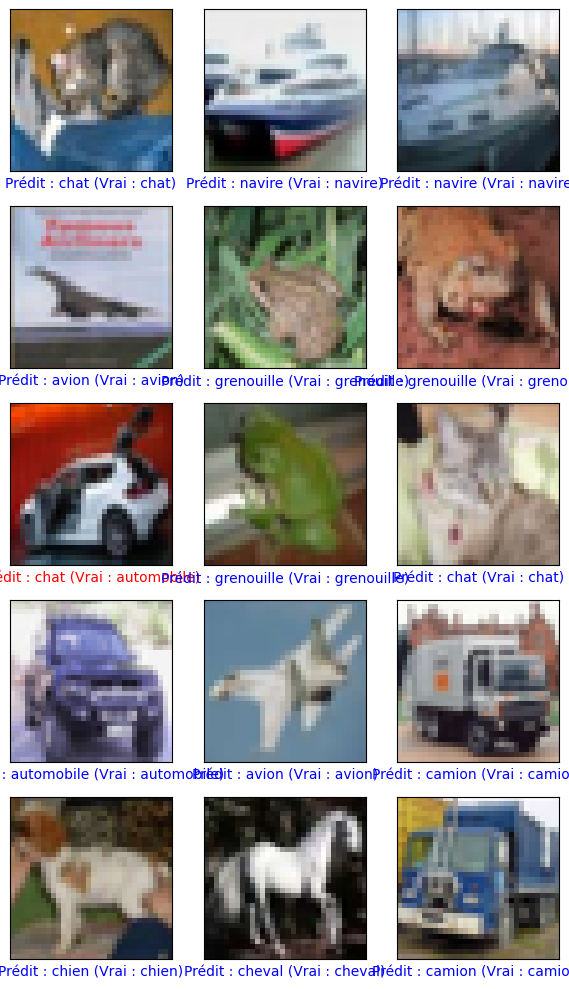

In [ ]:
# Faire des prédictions sur le jeu de test
predictions = model.predict(x_test)

# Fonction pour afficher l'image avec les étiquettes prédites et réelles
def afficher_image(i, predictions_array, etiquette_vraie, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    etiquette_predite = np.argmax(predictions_array)
    etiquette_vraie = np.argmax(etiquette_vraie)

    couleur = 'blue' if etiquette_predite == etiquette_vraie else 'red'
    plt.xlabel(f"Prédit : {noms_classes[etiquette_predite]} (Vrai : {noms_classes[etiquette_vraie]})", color=couleur)

# Afficher quelques images de test avec leurs prédictions
nb_lignes = 5
nb_colonnes = 3
nb_images = nb_lignes * nb_colonnes
plt.figure(figsize=(2 * nb_colonnes, 2 * nb_lignes))
for i in range(nb_images):
    plt.subplot(nb_lignes, nb_colonnes, i+1)
    afficher_image(i, predictions[i], y_test[i], x_test[i])
plt.tight_layout()
plt.show()

### Question 7

**Q7 :** Après avoir examiné les prédictions, identifiez et discutez des stratégies conceptuelles (par exemple, l'augmentation de données, le raffinement de l'architecture ou l'ajustement des hyperparamètres) qui pourraient améliorer la robustesse et la précision du modèle.

_Répondez dans une nouvelle cellule Markdown._

Identification et discussion des stratégies conceptuelles qui pourraient améliorer la robustesse et la précision du modèle:
Ajustement des hyperparamètre:
- Taux d'apprentissage (Learning Rate)
Le taux d'apprentissage détermine l'ampleur des mises à jour des poids lors de chaque itération de l'entraînement. Si le taux d'apprentissage est trop élevé, le modèle risque de diverger (les poids vont de manière trop agressive et l'erreur devient instable). Si le taux d'apprentissage est trop bas, l'entraînement peut devenir lent et risquer de se retrouver dans un minimum local.
Stratégies d'ajustement :
Commencez avec un taux d'apprentissage moyen (par exemple, 0.001) et ajustez selon les résultats.

Utilisez une approche de décroissance du taux d'apprentissage, où le taux diminue au fil du temps (par exemple, en utilisant des planificateurs de taux d'apprentissage comme ExponentialDecay ou ReduceLROnPlateau).

Testez des plages différentes de taux d'apprentissage (par exemple, de 0.0001 à 0.1) pour identifier la meilleure valeur.
Taille de batch (Batch Size)
La taille du batch fait référence au nombre d'exemples utilisés pour calculer une mise à jour des poids avant que le modèle ne passe à l'itération suivante. Une petite taille de batch peut rendre l'entraînement plus lent, mais améliore souvent la régularisation et l'aptitude à échapper aux minima locaux. En revanche, une grande taille de batch rend l'entraînement plus rapide mais peut entraîner un sur-apprentissage.

Stratégies d'ajustement :

Testez différentes tailles de batch, par exemple 16, 32, 64, et observez l'impact sur la précision du modèle et la vitesse d'entraînement.

Utilisez une taille de batch plus grande si vous avez un grand jeu de données et des ressources matérielles suffisantes.

- Nombre d'époques (Epochs)
  Le nombre d'époques représente combien de fois le modèle passe sur l'intégralité des données d'entraînement. Trop d'époques peuvent entraîner un sur-apprentissage (overfitting), tandis que trop peu peuvent empêcher le modèle de bien se généraliser.

Stratégies d'ajustement :
  Surveillez les courbes de perte d'entraînement et perte de validation pendant l'entraînement. Si la perte de validation commence à augmenter après un certain nombre d'époques, il est probable que le modèle sur-apprenne.

Utilisez des techniques comme early stopping, qui arrête l'entraînement lorsque la performance sur le jeu de validation cesse de s'améliorer.

- Taux de dropout
  Le dropout est une technique de régularisation qui consiste à désactiver aléatoirement certains neurones pendant l'entraînement pour éviter le sur-apprentissage. Le taux de dropout détermine la proportion de neurones désactivés à chaque itération.

Stratégies d'ajustement :

Testez des valeurs de taux de dropout allant de 0.2 à 0.5. Une valeur trop faible risque de ne pas être efficace pour la régularisation, tandis qu'une valeur trop élevée peut rendre l'entraînement trop lent ou sous-ajusté.

Appliquez-le de préférence aux couches entièrement connectées, mais pas aux couches de convolution.




## Étape 8 : Conclusion et Travaux Futurs

Dans ce notebook, nous avons :
- Configuré l'environnement et importé les bibliothèques nécessaires
- Chargé et prétraité le jeu de données CIFAR-10
- Exploré et visualisé les données
- Construit, compilé et entraîné un modèle CNN
- Évalué le modèle et visualisé ses prédictions

### Explication Pratique
Ce pipeline offre une approche complète, à la fois pratique et conceptuelle, pour la mise en œuvre d'un modèle de vision par ordinateur. Pour aller plus loin, vous pouvez explorer des architectures plus complexes, appliquer des techniques d'augmentation de données ou encore expérimenter avec différents optimisateurs afin de mieux comprendre l'impact de chacun sur la performance du modèle.